## Python libraries

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, roc_curve

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("heart.xls")
df.head(10)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [3]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

## Unique Value Analysis

In [6]:
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [7]:
# herbir sütunda kaç tane farklı değer olduğu
for i in list(df.columns):
    print(f"{i} -- {df[i].value_counts().shape[0]}")

age -- 41
sex -- 2
cp -- 4
trtbps -- 49
chol -- 152
fbs -- 2
restecg -- 3
thalachh -- 91
exng -- 2
oldpeak -- 40
slp -- 3
caa -- 5
thall -- 4
output -- 2


In [8]:
#herbir sütunda kaç tane eşsiz değer olduğu
for i in list(df.columns):
    print(f"{i} -- {df[i].value_counts().nunique()}")

age -- 16
sex -- 2
cp -- 4
trtbps -- 17
chol -- 6
fbs -- 2
restecg -- 3
thalachh -- 10
exng -- 2
oldpeak -- 15
slp -- 3
caa -- 5
thall -- 4
output -- 2


## Categorical Feature Analysis

In [9]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


<AxesSubplot:>

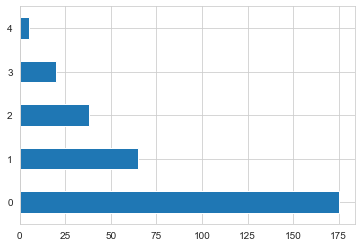

In [10]:
df["caa"].value_counts().plot(kind = 'barh')

In [11]:
categorical_list = ["sex","cp","fbs","restecg","exng","slp","caa","thall","output"]

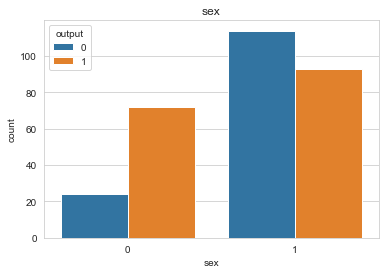

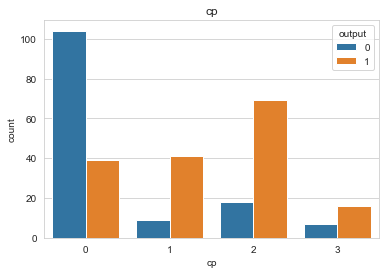

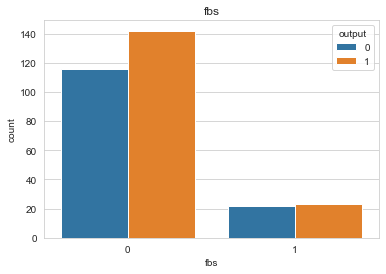

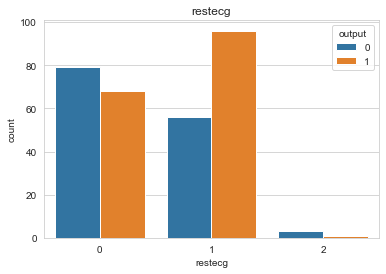

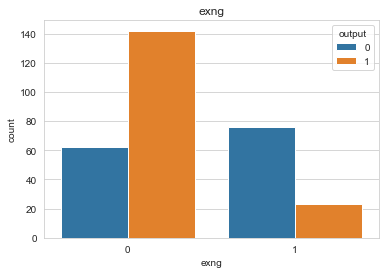

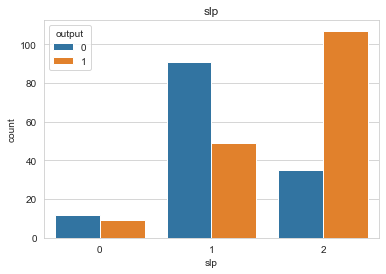

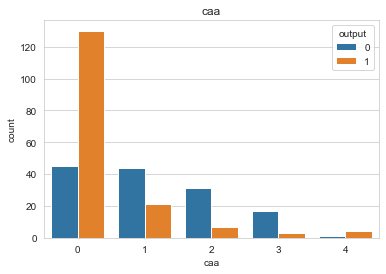

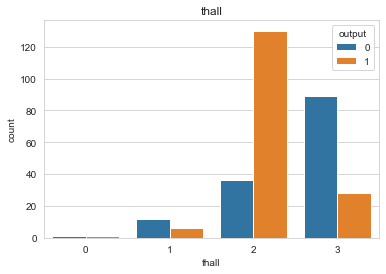

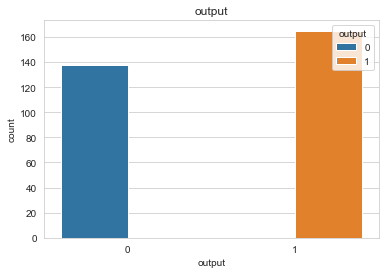

In [12]:
df_categoric = df.loc[:,categorical_list]

for i in categorical_list:
    plt.figure()
    sns.countplot(x= i, data = df_categoric, hue = "output")
    plt.title(i)

## Numeric Features Analysis

In [13]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [14]:
numeric_list = ["age","trtbps","chol","thalachh","oldpeak","output"]

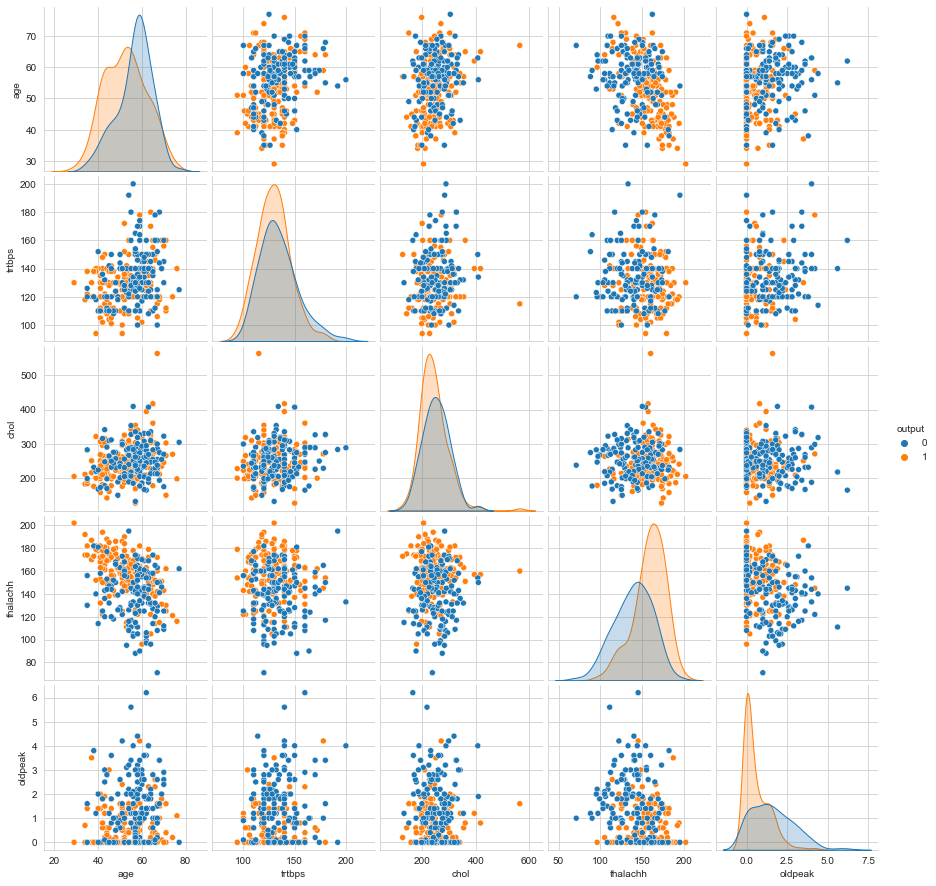

In [15]:
df_numeric = df.loc[:,numeric_list]
sns.pairplot(df_numeric, hue = "output", diag_kind = "kde")
plt.show()

* age ve thalachh sütunlarında negatif korelasyon var. Yani yaş azaldıkça thalachh değerleri artıyor.
* Yani daha fazla kalp krizi geçirme olasılığı artıyor fakat korelasyonun sayısal değerine de bakıcam.

## Standardization

In [16]:
scaler = StandardScaler()
scaler

StandardScaler()

In [17]:
df[numeric_list[:-1]]

,age,trtbps,chol,thalachh,oldpeak
0,63,145,233,150,2.3
1,37,130,250,187,3.5
2,41,130,204,172,1.4
3,56,120,236,178,0.8
4,57,120,354,163,0.6
...,...,...,...,...,...
298,57,140,241,123,0.2
299,45,110,264,132,1.2
300,68,144,193,141,3.4
301,57,130,131,115,1.2


In [18]:
scaled_array = scaler.fit_transform(df[numeric_list[:-1]])
scaled_array 

#0 ortalamalı, 1 standart sapmalı hale çevirdim.

array([[ 0.9521966 ,  0.76395577, -0.25633371,  0.01544279,  1.08733806],
       [-1.91531289, -0.09273778,  0.07219949,  1.63347147,  2.12257273],
       [-1.47415758, -0.09273778, -0.81677269,  0.97751389,  0.31091206],
       ...,
       [ 1.50364073,  0.70684287, -1.029353  , -0.37813176,  2.03630317],
       [ 0.29046364, -0.09273778, -2.2275329 , -1.51512489,  0.13837295],
       [ 0.29046364, -0.09273778, -0.19835726,  1.0649749 , -0.89686172]])

In [19]:
pd.DataFrame(scaled_array).describe()

,0,1,2,3,4
count,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02
mean,5.825923e-17,-7.146832e-16,-9.828955e-17,-5.203025e-16,-3.140136e-16
std,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00
min,-2.797624e+00,-2.148802e+00,-2.324160e+00,-3.439267e+00,-8.968617e-01
25%,-7.572802e-01,-6.638668e-01,-6.814943e-01,-7.061105e-01,-8.968617e-01
50%,6.988599e-02,-9.273778e-02,-1.210553e-01,1.466343e-01,-2.067053e-01
75%,7.316189e-01,4.783913e-01,5.456738e-01,7.151309e-01,4.834512e-01
max,2.496240e+00,3.905165e+00,6.140401e+00,2.289429e+00,4.451851e+00


## Box Plot Analysis

In [20]:
df_dummy = pd.DataFrame(scaled_array, columns = numeric_list[:-1])
df_dummy.head()

,age,trtbps,chol,thalachh,oldpeak
0,0.952197,0.763956,-0.256334,0.015443,1.087338
1,-1.915313,-0.092738,0.072199,1.633471,2.122573
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705
4,0.290464,-0.663867,2.082050,0.583939,-0.379244


In [21]:
df_dummy = pd.concat([df_dummy, df.loc[:, "output"]], axis = 1)
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [22]:
data_melted = pd.melt(df_dummy, id_vars = "output", var_name ="features", value_name ="value")
data_melted.head()

,output,features,value
0,1,age,0.952197
1,1,age,-1.915313
2,1,age,-1.474158
3,1,age,0.180175
4,1,age,0.290464


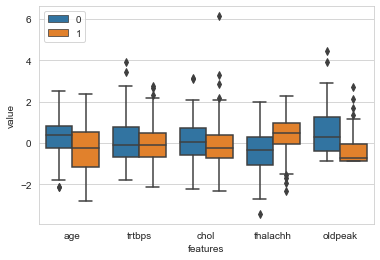

In [23]:
#box plot
plt.figure()
sns.boxplot(x = "features", y = "value", hue = "output", data = data_melted)
plt.legend(loc=2)
plt.show()

* thalachh ve oldpeak baya önemli featurelar olacak gibi

## Swarm Plot Analysis

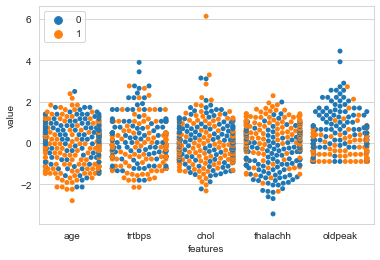

In [24]:
plt.figure()
sns.swarmplot(x = "features", y = "value", hue = "output", data = data_melted)
plt.legend(loc=2)
plt.show()

* Birey bazında baktım ve diğer 3 featurda pek bir ayrtım yok ama thalacc ve oldpeak bir kısmının altta ve bir kısmının üstte olduğunu görüyorum.
* Diğer üç feature'a göre bireyler arasındaki karışıklık çok fazla değil.

## Cat Plot Analysis

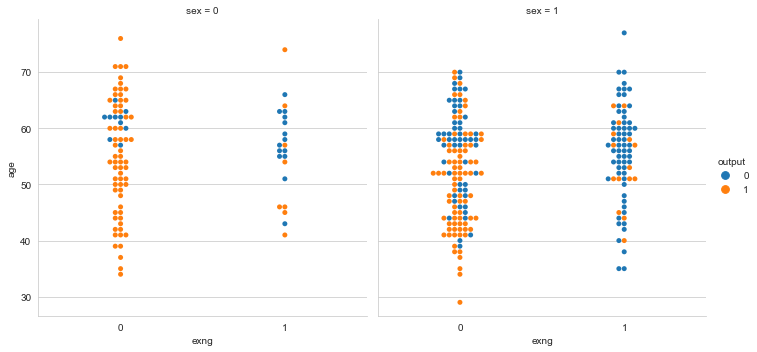

In [25]:
sns.catplot(x = "exng", y = "age", hue = "output", col= "sex", kind= "swarm", data =df);

* cinsiyet 0 olan bireyler egzersize bağlı göğüs ağrısı var mı sorusuna hayır demiş. Aslında göğüs ağrısı var ama egzersize bağlı değil bu yüzden kap krizi geçirme olasılığı fazla
* cinsiyet 1 olan bireyler  egzersize bağlı göğüs ağrısı var demişler yani kalp krizi riski az olanlar

## Correlation Analyisis

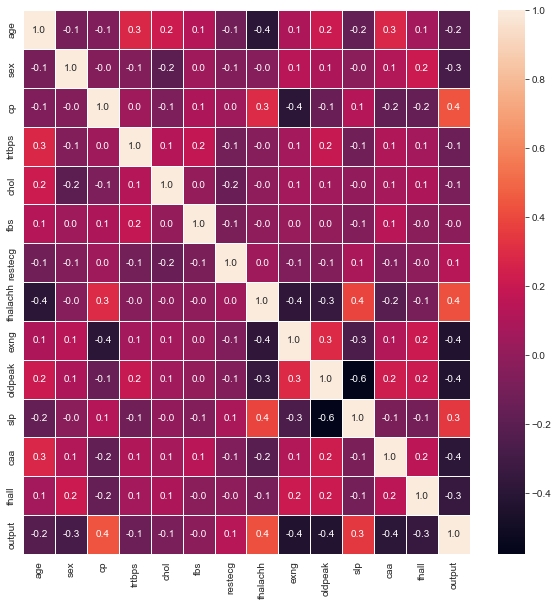

In [26]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot = True, fmt = ".1f", linewidths = .7);

* Egzersize bağlı göğüs ağrısı var dediğim zaman kalp krizi geçirme olsaılığım daha düşük. (Ters orantılı)

* restecg, fba, chol, trtbps sütunları ile output sütunu arasında ilişki yok

## Outlier Detection

In [27]:
numeric_list = ["age","trtbps","chol","thalachh","oldpeak"]
df_numeric=df.loc[:,numeric_list]
df_numeric.head()

,age,trtbps,chol,thalachh,oldpeak
0,63,145,233,150,2.3
1,37,130,250,187,3.5
2,41,130,204,172,1.4
3,56,120,236,178,0.8
4,57,120,354,163,0.6


In [28]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [29]:
# outlier detection
for i in numeric_list:
    
    #IQR
    Q1 = np.percentile(df.loc[:,i],25) #lower quantile
    Q3 = np.percentile(df.loc[:,i],75) #upper quantile
    
    IQR = Q3 - Q1
    
    print("Old shape: ", df.loc[:,i].shape)
    
    #upper bound
    upper = np.where(df.loc[:,i] >= (Q3 + 2.5*IQR))
    
    #lower bound
    lower = np.where(df.loc[:,i] <= (Q1 - 2.5*IQR))
    
    print(f"{upper} -- {lower}")
    
    try:
        df.drop(upper[0],inplace=True)
    except:
        print(f"KeyError: {upper[0]} not found axis")
        
    try:
        df.drop(lower[0],inplace=True)
    except:
        print(f"KeyError: {lower[0]} not found axis")
        
    print("New shape: ", df.shape)        
    

Old shape:  (303,)
(array([], dtype=int64),) -- (array([], dtype=int64),)
New shape:  (303, 14)
Old shape:  (303,)
(array([223, 248], dtype=int64),) -- (array([], dtype=int64),)
New shape:  (301, 14)
Old shape:  (301,)
(array([85], dtype=int64),) -- (array([], dtype=int64),)
New shape:  (300, 14)
Old shape:  (300,)
(array([], dtype=int64),) -- (array([], dtype=int64),)
New shape:  (300, 14)
Old shape:  (300,)
(array([203, 220], dtype=int64),) -- (array([], dtype=int64),)
New shape:  (298, 14)


* 5 tane aykırı değerden kurtuldum

## Modelling

In [30]:
df1 = df.copy()

In [31]:
df1 = pd.get_dummies(df1,columns = categorical_list[:-1],drop_first = True)
df1.head()

,age,trtbps,chol,thalachh,oldpeak,output,sex_1,cp_1,cp_2,cp_3,...,exng_1,slp_1,slp_2,caa_1,caa_2,caa_3,caa_4,thall_1,thall_2,thall_3
0,63,145,233,150,2.3,1,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,37,130,250,187,3.5,1,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,41,130,204,172,1.4,1,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
3,56,120,236,178,0.8,1,1,1,0,0,...,0,0,1,0,0,0,0,0,1,0
4,57,120,354,163,0.6,1,0,0,0,0,...,1,0,1,0,0,0,0,0,1,0


In [40]:
X = df1.drop("output",axis=1)
y = df1["output"]

In [41]:
X.head()

,age,trtbps,chol,thalachh,oldpeak,sex_1,cp_1,cp_2,cp_3,fbs_1,...,exng_1,slp_1,slp_2,caa_1,caa_2,caa_3,caa_4,thall_1,thall_2,thall_3
0,63,145,233,150,2.3,1,0,0,1,1,...,0,0,0,0,0,0,0,1,0,0
1,37,130,250,187,3.5,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,41,130,204,172,1.4,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3,56,120,236,178,0.8,1,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4,57,120,354,163,0.6,0,0,0,0,0,...,1,0,1,0,0,0,0,0,1,0


In [42]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: output, dtype: int64

In [43]:
scaler = StandardScaler()
scaler

StandardScaler()

In [44]:
X[numeric_list[:-1]]= scaler.fit_transform(X[numeric_list[:-1]])
X.head()

,age,trtbps,chol,thalachh,oldpeak,sex_1,cp_1,cp_2,cp_3,fbs_1,...,exng_1,slp_1,slp_2,caa_1,caa_2,caa_3,caa_4,thall_1,thall_2,thall_3
0,0.965901,0.845093,-0.236684,0.021855,2.3,1,0,0,1,1,...,0,0,0,0,0,0,0,1,0,0
1,-1.902555,-0.061886,0.119326,1.639116,3.5,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,-1.461254,-0.061886,-0.843995,0.983470,1.4,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3,0.193624,-0.666538,-0.173859,1.245729,0.8,1,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4,0.303950,-0.666538,2.297269,0.590082,0.6,0,0,0,0,0,...,1,0,1,0,0,0,0,0,1,0


## Train/Test Split

In [45]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.1,random_state=3)
print(f"{X_train.shape}")
print(f"{X_test.shape}")
print(f"{y_train.shape}")
print(f"{y_test.shape}")

(268, 22)
(30, 22)
(268,)
(30,)


## Logistic Regression

In [46]:
logreg = LogisticRegression()
logreg

LogisticRegression()

In [48]:
#fitting = training
logreg.fit(X_train,y_train)

LogisticRegression()

In [49]:
y_pred_prob = logreg.predict_proba(X_test)
y_pred_prob

array([[0.94252608, 0.05747392],
       [0.06987766, 0.93012234],
       [0.11254982, 0.88745018],
       [0.47977949, 0.52022051],
       [0.08754891, 0.91245109],
       [0.01966602, 0.98033398],
       [0.01313076, 0.98686924],
       [0.25608762, 0.74391238],
       [0.93025651, 0.06974349],
       [0.04680322, 0.95319678],
       [0.95711862, 0.04288138],
       [0.01124265, 0.98875735],
       [0.41858447, 0.58141553],
       [0.6057325 , 0.3942675 ],
       [0.02733085, 0.97266915],
       [0.0261538 , 0.9738462 ],
       [0.84053044, 0.15946956],
       [0.03593571, 0.96406429],
       [0.86161159, 0.13838841],
       [0.97599523, 0.02400477],
       [0.6204125 , 0.3795875 ],
       [0.31203666, 0.68796334],
       [0.93491854, 0.06508146],
       [0.00474821, 0.99525179],
       [0.44481395, 0.55518605],
       [0.33837871, 0.66162129],
       [0.03945105, 0.96054895],
       [0.99154232, 0.00845768],
       [0.46749931, 0.53250069],
       [0.69698284, 0.30301716]])

In [53]:
y_test

178    0
182    0
102    1
70     1
67     1
163    1
123    1
25     1
219    0
82     1
242    0
16     1
31     1
252    0
38     1
74     1
209    0
58     1
215    0
244    0
106    1
196    0
217    0
124    1
129    1
119    1
154    1
187    0
5      1
271    0
Name: output, dtype: int64

In [51]:
y_pred = np.argmax(y_pred_prob,axis = 1)
y_pred

array([0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0], dtype=int64)

In [52]:
dummy_ = pd.DataFrame(y_pred_prob)
dummy_["y_pred"] = y_pred
dummy_.head()

,0,1,y_pred
0,0.942526,0.057474,0
1,0.069878,0.930122,1
2,0.112550,0.887450,1
3,0.479779,0.520221,1
4,0.087549,0.912451,1


In [54]:
print(f"Test accuracy: {accuracy_score(y_pred,y_test)}")

Test accuracy: 0.9


In [56]:
# Roc Curve
fpr, tpr, thresholds = roc_curve(y_test,y_pred_prob[:,1])

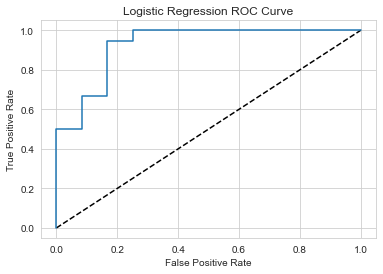

In [57]:
# plot curve
plt.plot([0,1], [0,1],"k--")
plt.plot(fpr, tpr, label = "Logistic Regression")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Logistic Regression ROC Curve")
plt.show()

## Hyperparameter Tuning

In [58]:
lr = LogisticRegression()
lr

LogisticRegression()

In [60]:
penalty = ["l1", "l2"]
parameters = {"penalty":penalty}

In [61]:
lr_searcher = GridSearchCV(lr,parameters)

In [62]:
lr_searcher.fit(X_train,y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'penalty': ['l1', 'l2']})

In [63]:
print("Best parameters: ",lr_searcher.best_params_)

Best parameters:  {'penalty': 'l2'}


In [65]:
y_pred = lr_searcher.predict(X_test)
y_pred

array([0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0], dtype=int64)

In [66]:
print(f"Test accuracy: {accuracy_score(y_pred,y_test)}")

Test accuracy: 0.9
